# Linear Regression on Ecommerce Customers Experience

* Project: Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want. The company is trying to decide whether to focus their efforts on their mobile app experience or their website.
* Project Scope: Analyze,Visualize, apply Linear Regression model and conclude with suggestion
* Data source: Ecommerce Customers.csv file
* The data contains the following columns:

    * Customer info, suchas Email, Address, and their color Avatar. 
    * Avg. Session Length: Average session of in-store style advice sessions.
    * Time on App: Average time spent on App in minutes
    * Time on Website: Average time spent on Website in minutes
    * Length of Membership: How many years the customer has been a member.

## Import libraries & Load data

In [1]:
# Import Data Analysis libraries
import pandas as pd
import numpy as np

# Import Data Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# For display in notebook
%matplotlib inline

# Load US housig data
Customers = pd.read_csv('Ecommerce Customers.csv')

## Lets check the data

In [2]:
# let check information in the CSV file
Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


* We can see there are 8 Columns and its datatypes:
* Out of 7 columns, 6 are input variables/features (X), 1 output /target variable (y) 
* There are 5000rows/training examples (m)

In [3]:
# Checking for null columns
Customers.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

we see that there are no null data in any columns

In [4]:
# lets check the data
Customers.head(5)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


Data in this data set is self explanatory

In [5]:
Customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


This gives descriptive statistics that sumarize the central tendency of numarical columns
* Avg. yearly amount spent by a customer is $499.30
* we an clearly see customers are spending more time on website than app. Avg. time spent on app vs website is 12.05 vs 37.06
* Most customers are spending 30 + mins for style advice session
* Avg lenght of the mebership is 3.5 years

## Let's analyze and visualize data

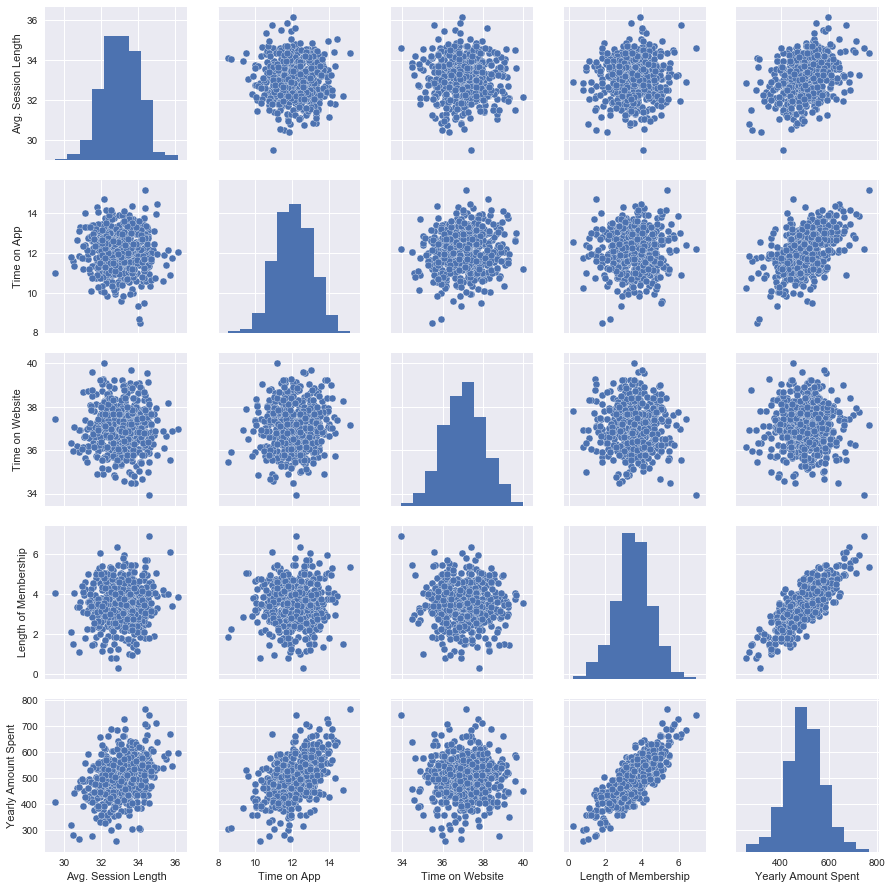

In [6]:
# Lets see types of relationships across the entire data set
sns.pairplot(Customers)

** Things to note: **
    * In most cases, we can notice as the amount of time spent on app increases, yearly Amount spent is also increasing. Where as in case of Time on website we dont see it that much
    * As the length of the membership increases, yearly Amount spent 

** Time on site vs Money spent **

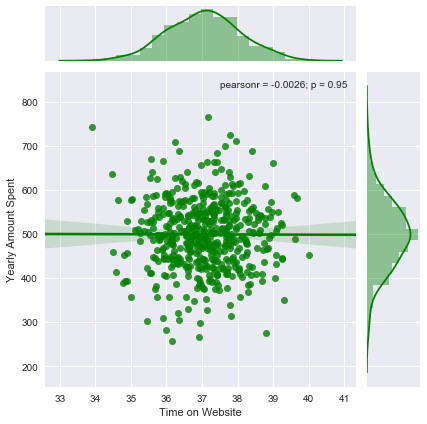

In [7]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',kind = 'reg',data=Customers, color='green')
plt.show()

** Time on app vs Money spent **

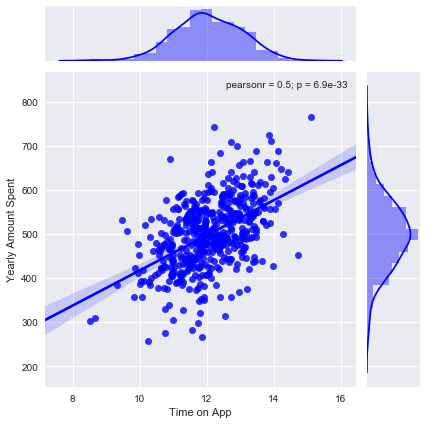

In [8]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',kind = 'reg', data=Customers, color='blue')

** Lenghth of membership vs Money spent **

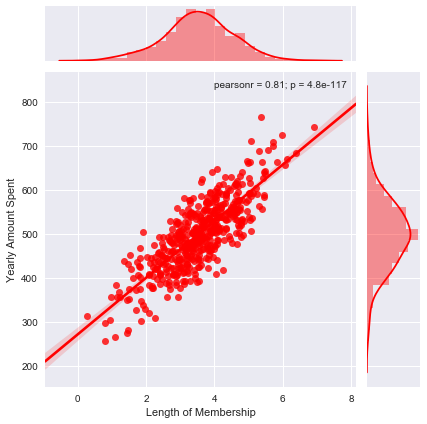

In [9]:
sns.jointplot(x='Length of Membership',y='Yearly Amount Spent',kind = 'reg', data=Customers, color='red')
plt.show()

As the length of the membership increases, we can notice, customers are spending more

## Spliting data into input and output variables

In [10]:
X = Customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y = Customers['Yearly Amount Spent']

In [11]:
X.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


## Splitting the dataset into the Training set and Test set

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Fitting Linear Regression to the Training set

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Predicting the Test set results

In [14]:
y_pred = lr.predict(X_test)

## Evaluating the model

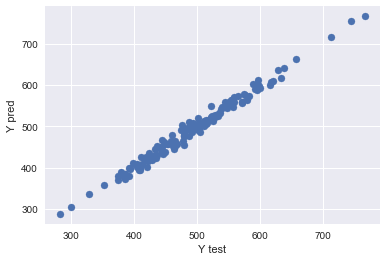

In [15]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

In [18]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

MAE: 7.851377170861441
MSE: 94.55779479273274
RMSE: 9.724083236620958
R2: 0.9849262667370623


** Residuals **

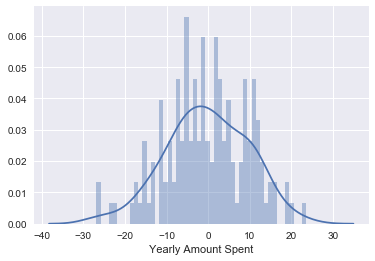

In [19]:
sns.distplot((y_test-y_pred),bins=50);

Histogram of the residuals looks normally distributed

In [20]:
# print the intercept
print(lr.intercept_)

-1037.8257485695394


In [21]:
# coefficients
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Session Length,25.767530
Time on App,38.800394
Time on Website,-0.018041
Length of Membership,61.852568


**Interpreting the coefficients: **

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.76 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.80 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of -0.018 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.85 total dollars spent**.

**In conclusion:**
* 'Length of Membership','Time on App' feature are two most important features and is increasing value to Yearly Amount Spent.
* There are two ways to think about this: 
            - Develop the Website to catch up to the performance of the mobile app, or 
            - Develop the app more since that is what is working better
* To conclude, answer really depends on the other factors going on at the company, you would probably want to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion